In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

+ Download dữ liệu CIFAR10 sau đó chia thành 2 tập dữ liệu train và validation.
+ Chuẩn hóa dữ liệu với mean = 0.5 và std = 0.5

In [ ]:
transform = 
trainset = 
trainloader = 
testset = 
testloader = 

+ Hiển thị 5 ảnh đầu tiên trong tập dữ liệu testing

In [ ]:
def imshow(img):
    

for i, (images, labels) in enumerate(trainloader, 0):
    
    break

+ Xây dựng model MLP cơ bản để train tập dữ liệu CIFAR10

In [168]:
def getModel(n_features):
    model = 
    return model


+ Khởi tạo hàm loss function và phương thức optimizer

In [ ]:
n_features = 
model = getModel(n_features)
lr = 0.01
optim = 
loss_fn = 
model

+ Xây dựng hàm đánh giá model

In [171]:
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy


+ Bắt đầu training và đánh giá model.

In [175]:
n_epochs = 10
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    running_loss = 0.0
    running_correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        
        inputs, labels = inputs.to(device), labels.to(device)



        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()


        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()
     

    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, loss_fn)
    print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/10], Loss: 0.7660, Accuracy: 74.91%, Test Loss: 0.7522, Test Accuracy: 74.97%
Epoch [2/10], Loss: 0.7202, Accuracy: 75.88%, Test Loss: 0.7148, Test Accuracy: 75.58%
Epoch [3/10], Loss: 0.6869, Accuracy: 76.63%, Test Loss: 0.6870, Test Accuracy: 76.14%
Epoch [4/10], Loss: 0.6613, Accuracy: 77.32%, Test Loss: 0.6649, Test Accuracy: 76.82%
Epoch [5/10], Loss: 0.6403, Accuracy: 77.97%, Test Loss: 0.6465, Test Accuracy: 77.31%
Epoch [6/10], Loss: 0.6228, Accuracy: 78.47%, Test Loss: 0.6307, Test Accuracy: 77.80%
Epoch [7/10], Loss: 0.6079, Accuracy: 78.99%, Test Loss: 0.6182, Test Accuracy: 78.27%
Epoch [8/10], Loss: 0.5949, Accuracy: 79.48%, Test Loss: 0.6058, Test Accuracy: 78.67%
Epoch [9/10], Loss: 0.5837, Accuracy: 79.75%, Test Loss: 0.5962, Test Accuracy: 78.93%
Epoch [10/10], Loss: 0.5734, Accuracy: 80.17%, Test Loss: 0.5870, Test Accuracy: 79.21%


In [ ]:
plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.title('Loss Epochs')
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy Epoch')
plt.plot(test_accuracies, label = 'Test Accuracy')
plt.legend()

+ Dưới đây là bài tập về code from scratch

In [75]:
def zScoreScaling(tensor):

In [76]:
def minMaxScaling(tensor):

In [61]:
class Linear:
    

In [77]:
tensor = torch.tensor([
    [1.0, 2.0, 3.0], 
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0]
])
zscore = zScoreScaling(tensor)
min_max = minMaxScaling(tensor)
print(zscore)
print(min_max)


tensor([[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]])
tensor([[0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.5000],
        [1.0000, 1.0000, 1.0000]])


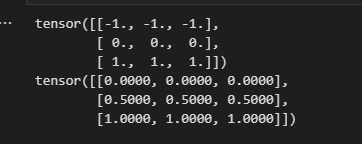

In [ ]:
tensor = torch.tensor([1.0, 2.0, 3.0])
linear = Linear(3, 2)
out = linear.forward(tensor)
print(out)
print(f"Weight = {linear.weight}")
print(f"Bias = {linear.bias}")